In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline 

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
file_path = r"C:\Users\Shubham Singh\OneDrive\Desktop\Online Retail Data Set.csv"

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Data loaded successfully from Downloads!")
except FileNotFoundError:
    print("Still can't find it! Double check the spelling.")

Data loaded successfully from Downloads!


In [3]:
# 1. Shows the first 5 rows to see what the data looks like
display(df.head())

# 2. Shows the shape (How many rows and columns?)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# 3. Checks data types and missing values
print("\n--- Data Info ---")
df.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


The dataset has 541909 rows and 8 columns.

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# --- 1. Handling Missing Values ---
df.dropna(subset=['CustomerID'], inplace=True)

# --- 2. Handling Duplicates ---
df.drop_duplicates(inplace=True)

# --- 3. Fixing Data Types ---
# Python reads the date as "text". We convert it to "DateTime" so we can do math with it.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# --- 4. Removing Returns & Errors ---
# Quantity < 0 usually means a return. UnitPrice < 0 is an error.
# We only want positive sales.
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# --- 5. Feature Engineering (Creating New Data) ---
# The dataset has Price and Quantity, but not the Total Amount spent.
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

print("Cleaning complete!")
print(f"Rows remaining: {df.shape[0]}")

Cleaning complete!
Rows remaining: 392692


In [5]:
display(df.describe())

# Checks the data types to ensure InvoiceDate is now 'datetime64[ns]'
df.info()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalSales   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [6]:
df['Description'] = df['Description'].fillna('Unknown')

In [7]:
print(f"Rows remaining: {df.shape[0]}")

Rows remaining: 392692


In [8]:
# 1. Convert to lowercase
df['Description'] = df['Description'].str.lower()

# 2. Strip leading/trailing whitespace
df['Description'] = df['Description'].str.strip()

In [9]:
# Removes anything that isn't a letter, number, or space
# The regex '[^\w\s]' means "replace any character that is NOT a word char or space"
df['Description'] = df['Description'].str.replace(r'[^\w\s]', '', regex=True)

In [10]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
# Create a boolean column (True if found, False if not)
df['is_urgent'] = df['Description'].str.contains('urgent')

# Checks for multiple keywords using the pipe symbol | (OR)
df['has_issue'] = df['Description'].str.contains('error|fail|break')

In [12]:
# Extract the first occurrence of 4 digits
# \d means digit, {4} means exactly 4 times
df['extracted_code'] = df['Description'].str.extract(r'(\d{4})')

In [13]:
# Count characters
df['char_length'] = df['Description'].str.len()

# Count words (by splitting on spaces)
df['word_count'] = df['Description'].str.split().str.len()

In [14]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,is_urgent,has_issue,extracted_code,char_length,word_count
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False,NaN,33,5
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,NaN,19,3
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False,NaN,30,5
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,NaN,35,6
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,NaN,29,5


In [15]:
# dropna=False ensures we count the NaNs (failures) too
print(df['extracted_code'].value_counts(dropna=False))

extracted_code
NaN     392691
1708         1
Name: count, dtype: int64


In [16]:
df = df.drop(columns=['extracted_code'])

In [17]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,is_urgent,has_issue,char_length,word_count
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False,33,5
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,19,3
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False,30,5
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,35,6
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,29,5


In [18]:
# Checks how many are True vs False
print(df['is_urgent'].value_counts())

is_urgent
False    392692
Name: count, dtype: int64


In [19]:
df = df.drop(columns=['is_urgent'])

In [20]:
print(df['has_issue'].value_counts())

has_issue
False    391837
True        855
Name: count, dtype: int64


In [21]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,has_issue,char_length,word_count
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,33,5
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,19,3
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,30,5
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,35,6
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,29,5


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize the vectorizer
# max_features=500: Only keep the top 500 most important words to save memory
tfidf = TfidfVectorizer(max_features=500)

# 2. Fit and transform the Description column
# This creates a giant matrix of numbers representing the text
tfidf_matrix = tfidf.fit_transform(df['Description'])

print(tfidf.get_feature_names_out()[:20])

['10' '11' '12' '20' '24' '36' '3d' '50s' '60' '72' 'acapulco' 'acrylic'
 'airline' 'alarm' 'alphabet' 'and' 'angel' 'animals' 'ant' 'antique']


In [23]:
# 1. Checks for missing values in OTHER columns
print("--- Missing Values ---")
print(df.isnull().sum())
print("\n")

# 2. Checks for exact duplicate rows (common in this dataset)
print("--- Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
print("\n")

# 3. Checks Data Types
print("--- Data Types ---")
print(df.info())
print("\n")

# 4. Checks for weird numerical values
print("--- Numerical Stats ---")
print(df.describe())

--- Missing Values ---
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
has_issue      0
char_length    0
word_count     0
dtype: int64


--- Duplicates ---
Duplicate Rows: 0


--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalSales   392692 non-null  float64       
 9   has_issue    392692 non-null  bool     

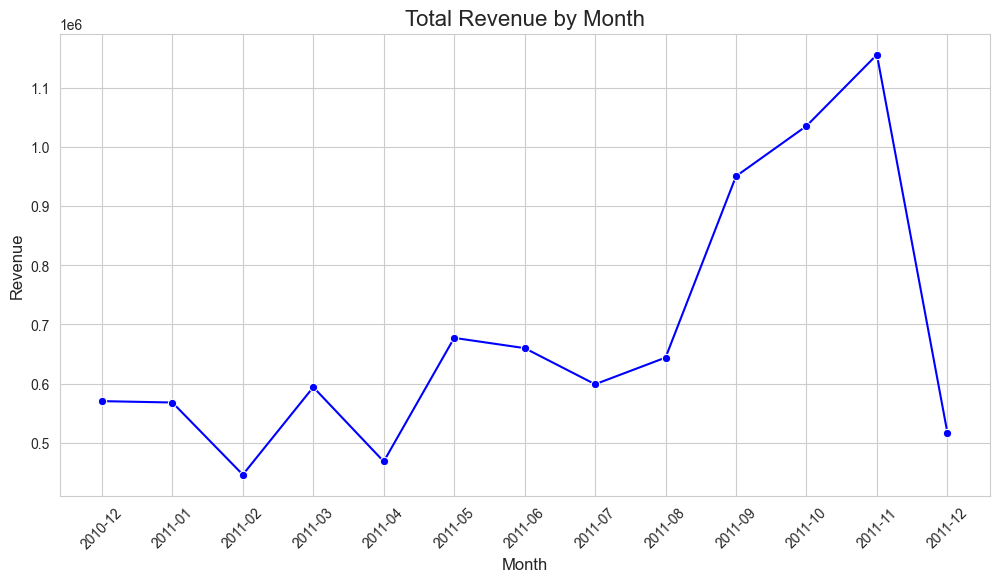

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Creating a new column for Year-Month (e.g., 2011-12)
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and sum the TotalSales
monthly_sales = df.groupby('Month')['TotalSales'].sum()

# Converting index to string for cleaner plotting
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Total Revenue by Month', fontsize=16)
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.show()

C:\Users\Shubham Singh\AppData\Local\Temp\ipykernel_28352\706909067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')


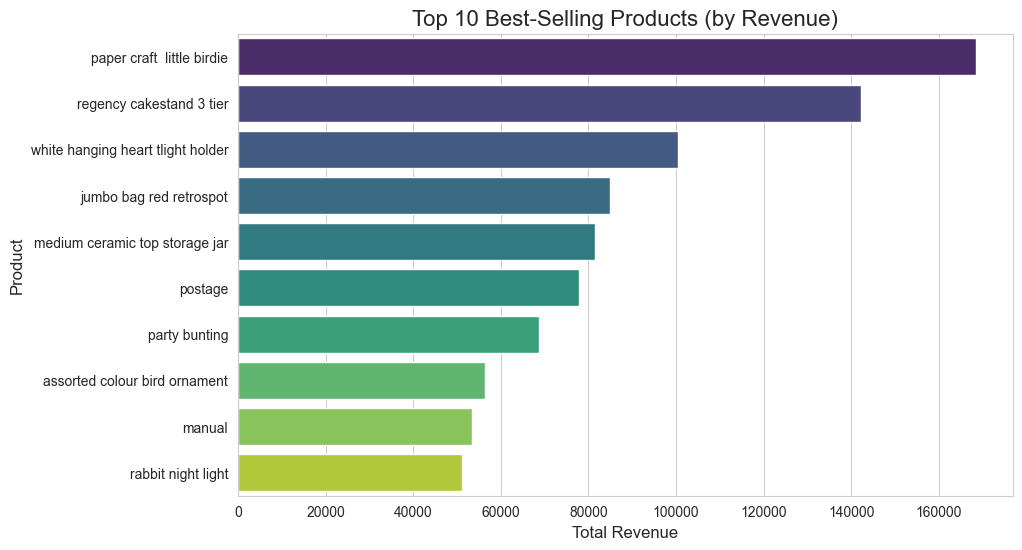

In [25]:
# Group by Product Description
product_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

top_10_products = product_sales.head(10)

plt.figure(figsize=(10, 6))
# We use a horizontal bar chart (barplot) because product names are long
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products (by Revenue)', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

C:\Users\Shubham Singh\AppData\Local\Temp\ipykernel_28352\3418400612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


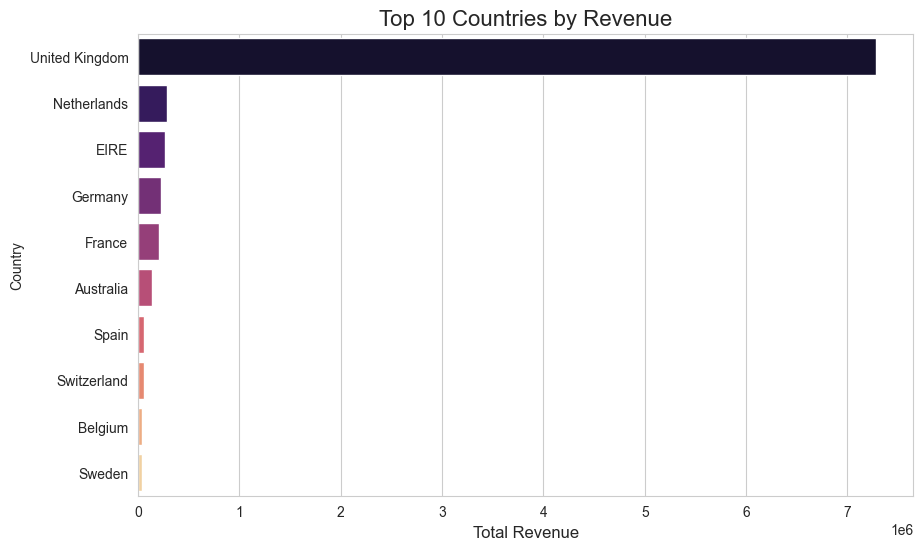

In [26]:
# Group by Country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

top_10_countries = country_sales.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 Countries by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.show()

In [27]:
# 1. Set the reference date (1 day after the max date in data)
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 2. Group by CustomerID and calculate the metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique',                                # Frequency (count unique invoices)
    'TotalSales': 'sum'                                    # Monetary
})

# 3. Rename columns for clarity
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSales': 'Monetary'
}, inplace=True)

# 4. Check the result
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


In [28]:
# 1. Score Recency (Reverse order: Low days = Score 4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# 2. Score Frequency (Normal order: High count = Score 4)
# We use .rank(method='first') here to handle ties (many people have exactly 1 order)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# 3. Score Monetary (Normal order: High money = Score 4)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# 4. Combine into a single "RFM_Group" string (e.g., "444")
rfm['RFM_Group'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# See the result
print(rfm.head())

            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Group
CustomerID                                                                
12346.0         326          1  77183.60       1       1       4       114
12347.0           2          7   4310.00       4       4       4       444
12348.0          75          4   1797.24       2       3       4       234
12349.0          19          1   1757.55       3       1       4       314
12350.0         310          1    334.40       1       1       2       112


In [29]:
def segment_customer(row):
    # If they are in the top tier for everything
    if row['RFM_Group'] == '444':
        return 'Champion'
    # If Recency and Frequency are high
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal'
    # If Frequency is high but Recency is low (haven't seen them lately)
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    # If Recency is high (new) but frequency low
    elif row['R_Score'] >= 3 and row['F_Score'] <= 1:
        return 'New Customer'
    # Everyone else
    else:
        return 'Need Attention'

# Apply the function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count how many customers are in each segment
print(rfm['Segment'].value_counts())

Segment
Need Attention    1910
Loyal             1034
At Risk            646
Champion           489
New Customer       259
Name: count, dtype: int64


C:\Users\Shubham Singh\AppData\Local\Temp\ipykernel_28352\3178682131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='coolwarm')


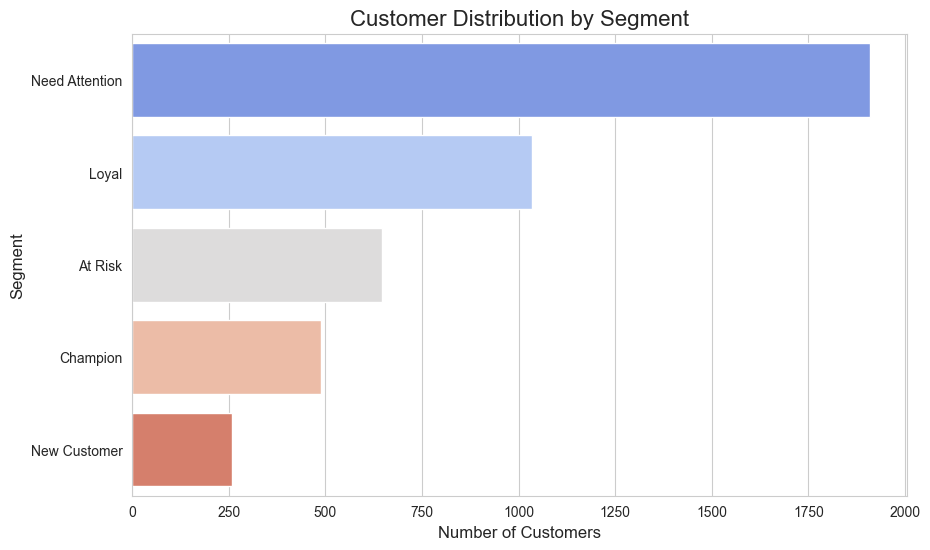

In [30]:
# Calculate counts for each segment
segment_counts = rfm['Segment'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='coolwarm')
plt.title('Customer Distribution by Segment', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.show()

In [31]:
# Filter for Champions
champions = rfm[rfm['Segment'] == 'Champion']

# Calculate the average money they spent
avg_spend = champions['Monetary'].mean()

print(f"You have {len(champions)} Champions.")
print(f"On average, they have spent: ${avg_spend:.2f}")
print("\nTop 5 Champions:")
print(champions.sort_values('Monetary', ascending=False).head())

You have 489 Champions.
On average, they have spent: $9047.80

Top 5 Champions:
            Recency  Frequency   Monetary R_Score F_Score M_Score RFM_Group  \
CustomerID                                                                    
14646.0           2         73  280206.02       4       4       4       444   
18102.0           1         60  259657.30       4       4       4       444   
17450.0           8         46  194390.79       4       4       4       444   
14911.0           1        201  143711.17       4       4       4       444   
14156.0          10         55  117210.08       4       4       4       444   

             Segment  
CustomerID            
14646.0     Champion  
18102.0     Champion  
17450.0     Champion  
14911.0     Champion  
14156.0     Champion  


In [32]:
# Group by new 'Segment' column and calculate the average Recency, Frequency, and Monetary
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Segment': 'count' # This counts the number of customers in each group
})

# Renaming the count column for clarity
segment_analysis.rename(columns={'Segment': 'Customer Count'}, inplace=True)

# Sort by Monetary value to see who brings in the most cash
segment_analysis = segment_analysis.sort_values('Monetary', ascending=False)

# Display the summary
print(segment_analysis.round(2))

                Recency  Frequency  Monetary  Customer Count
Segment                                                     
Champion           7.42      15.53   9047.80             489
Loyal             22.63       5.22   2088.74            1034
At Risk          119.20       4.17   1607.14             646
Need Attention   152.03       1.35    614.29            1910
New Customer      27.09       1.00    353.53             259


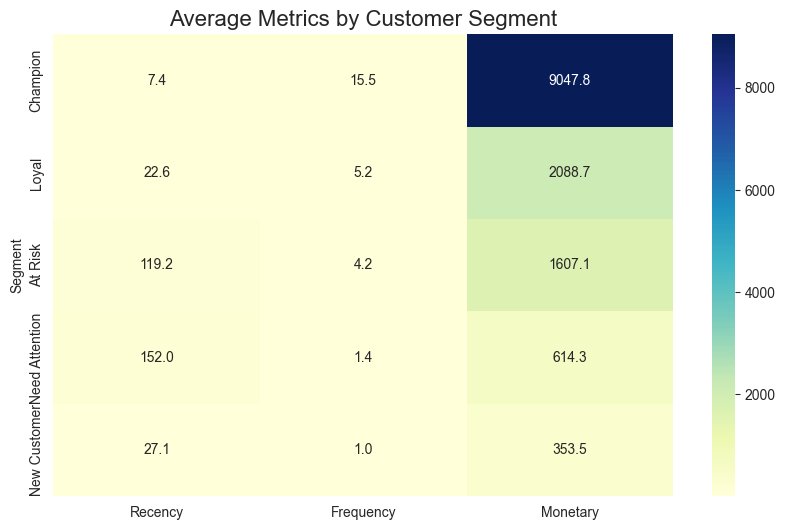

In [33]:
# Creating a heatmap to visualize the differences
plt.figure(figsize=(10, 6))
# We drop 'Customer Count' because the scale is too different from the other metrics
sns.heatmap(segment_analysis.drop(columns=['Customer Count']), annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Metrics by Customer Segment', fontsize=16)
plt.show()

In [34]:
!pip install mlxtend

In [35]:
# 1. Filter for a specific country to keep the dataset manageable (e.g., France)
basket_data = df[df['Country'] == 'France']

# 2. Pivot the data: One row per Invoice, one column per Product
# We sum the quantity, then convert to 1 (bought) or 0 (not bought)
basket = (basket_data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# 3. Convert all positive numbers to 1, and everything else to 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.map(encode_units)

# Drop the 'POSTAGE' column if it exists (it's not a real product)
if 'POSTAGE' in basket_encoded.columns:
    basket_encoded.drop('POSTAGE', inplace=True, axis=1)

print("Basket ready! Shape:", basket_encoded.shape)

Basket ready! Shape: (389, 1542)


In [36]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
basket_encoded = basket_encoded.astype(bool)
# 1. Find frequent itemsets (items bought together at least 7% of the time)
frequent_itemsets = apriori(basket_encoded, min_support=0.07, use_colnames=True)

# 2. Generate the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 3. Sort by 'Lift' to see the strongest connections first
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Display the top 5 rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                              antecedents  \
77  (alarm clock bakelike green, postage)   
80             (alarm clock bakelike red)   
3              (alarm clock bakelike red)   
2            (alarm clock bakelike green)   
78    (alarm clock bakelike red, postage)   

                              consequents   support  confidence      lift  
77             (alarm clock bakelike red)  0.071979    0.848485  8.920557  
80  (alarm clock bakelike green, postage)  0.071979    0.756757  8.920557  
3            (alarm clock bakelike green)  0.079692    0.837838  8.576814  
2              (alarm clock bakelike red)  0.079692    0.815789  8.576814  
78           (alarm clock bakelike green)  0.071979    0.823529  8.430341  


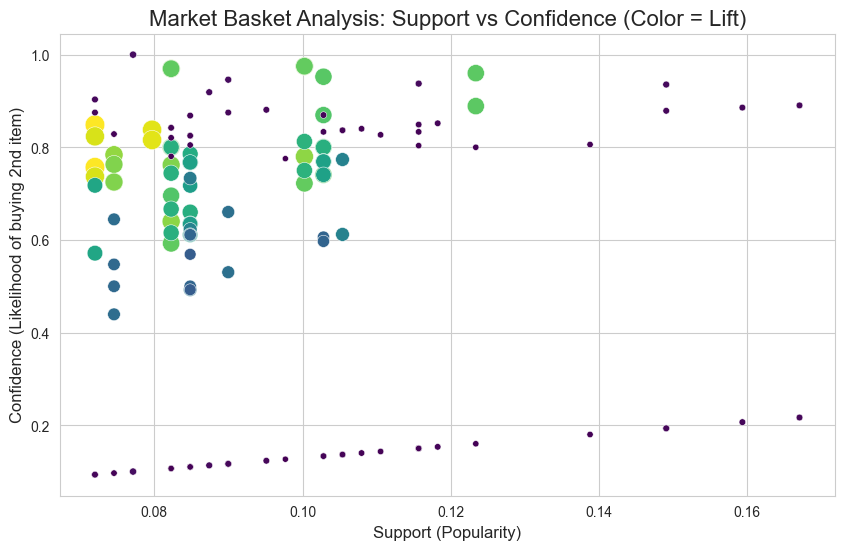

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules,
    x="support",
    y="confidence",
    size="lift",
    hue="lift",
    sizes=(20, 200),
    palette="viridis",
    legend=False
)
plt.title('Market Basket Analysis: Support vs Confidence (Color = Lift)', fontsize=16)
plt.xlabel('Support (Popularity)', fontsize=12)
plt.ylabel('Confidence (Likelihood of buying 2nd item)', fontsize=12)
plt.show()

In [38]:
!pip install -r requirements.txt


   ---------------------------------------- 0/6 [webcolors]
   ------------- -------------------------- 2/6 [lark]
   ------------- -------------------------- 2/6 [lark]
   ------------- -------------------------- 2/6 [lark]
   ------------- -------------------------- 2/6 [lark]
   ------------- -------------------------- 2/6 [lark]
   -------------------- ------------------- 3/6 [fqdn]
   --------------------------------- ------ 5/6 [isoduration]
   --------------------------------- ------ 5/6 [isoduration]
   ---------------------------------------- 6/6 [isoduration]



In [39]:
## Conclusion. The analysis highlights a significant opportunity to bundle products and reactivate churned users."